# Kamera


In [3]:
import numpy as np
from pylab import *
import cv2
%matplotlib inline

# Grauwertkeiles

## Unser Bild


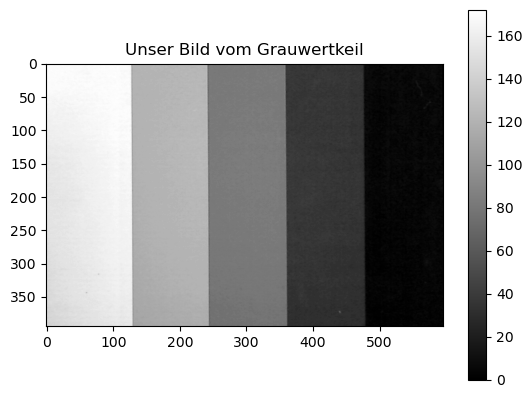

In [4]:
grauwertkeil_unser = cv2.imread("Kamera Messungen/grau1.png")
grauwertkeil_unser = cv2.cvtColor(grauwertkeil_unser, cv2.COLOR_RGB2GRAY)
figure()
imshow(grauwertkeil_unser, cmap="gray")
colorbar()
title('Unser Bild vom Grauwertkeil')
show()

## Original


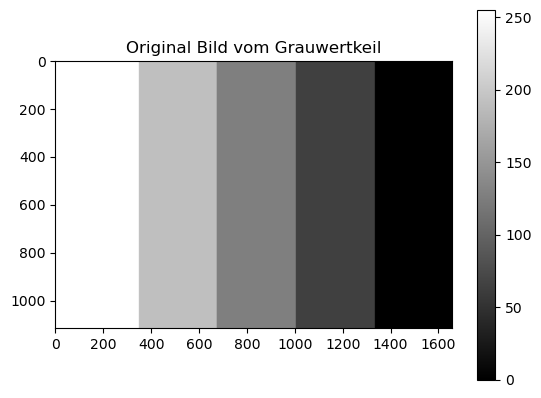

In [5]:
grauwertkeil_orignal = cv2.imread("Kamera Messungen/original_grau.png")
grauwertkeil_orignal = cv2.cvtColor(grauwertkeil_orignal, cv2.COLOR_RGB2GRAY)
figure()
imshow(grauwertkeil_orignal, cmap="gray")
colorbar()
title('Original Bild vom Grauwertkeil')
show()

teil1 = grauwertkeil_orignal[:, 0:200]
teil2 = grauwertkeil_orignal[:, 400:600]
teil3 = grauwertkeil_orignal[:, 800:900]
teil4 = grauwertkeil_orignal[:, 1100:1250]
teil5 = grauwertkeil_orignal[:, 1400:1600]
teile_original_bild_mean = np.array([np.mean(teil1), np.mean(teil2), np.mean(teil3), np.mean(teil4), np.mean(teil5)])
teile_original_bild_std = np.array([np.std(teil1), np.std(teil2), np.std(teil3), np.std(teil4), np.std(teil5)])

# Aufteilen


[161.77111675 120.05796954  81.80360406  35.39401015   3.79670051]
[5.11984774 2.71719285 1.86064156 2.22789985 1.95197135]


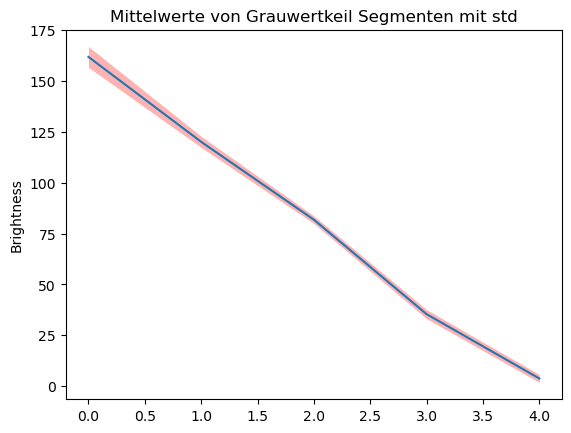

In [6]:
teil1 = grauwertkeil_unser[:, 50:100]
teil2 = grauwertkeil_unser[:, 150:200]
teil3 = grauwertkeil_unser[:, 280:330]
teil4 = grauwertkeil_unser[:, 400:450]
teil5 = grauwertkeil_unser[:, 500:550]
teile_unser_bild = np.array([teil1, teil2, teil3, teil4, teil5])
teile_unser_bild_mean = np.array([np.mean(teil1), np.mean(teil2), np.mean(teil3), np.mean(teil4), np.mean(teil5)])
teile_unser_bild_std = np.array([np.std(teil1), np.std(teil2), np.std(teil3), np.std(teil4), np.std(teil5)])
print(teile_unser_bild_mean)
print(teile_unser_bild_std)
figure()
x = range(0, 5)
plot(x, teile_unser_bild_mean)
fill_between(x, teile_unser_bild_mean + teile_unser_bild_std, teile_unser_bild_mean - teile_unser_bild_std, alpha=0.3, color='red', linewidth=0)
title('Mittelwerte von Grauwertkeil Segmenten mit std')
ylabel('Brightness')
show()

# Dunkelbild


max=0.0


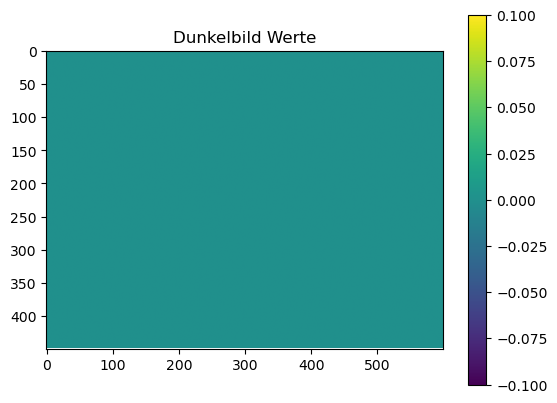

In [7]:
def read_black_image(img_num):
    black_img = cv2.imread("Kamera Messungen/test" + str(img_num) + ".png")
    black_img = cv2.cvtColor(black_img, cv2.COLOR_BGR2GRAY)
    return black_img[10:460, 0:600]

black_images = np.array([
    read_black_image(0),
    read_black_image(1),
    read_black_image(2),
    read_black_image(3),
    read_black_image(4),
    read_black_image(5),
    read_black_image(6),
    read_black_image(7),
    read_black_image(8),
    read_black_image(9),
], dtype=np.float64)

summed_black_image = np.sum(black_images, axis=0)
mean_black_image = summed_black_image / size(black_images)

print("max=" + str(np.max(mean_black_image)))
# mean_image = mean_image / np.max(mean_image)

figure()

imshow(mean_black_image)
colorbar()

title('Dunkelbild Werte')

show()

black_image_shape = shape(mean_black_image)

def sub_black_image(img):
    img_shape = np.shape(img)
    return img - mean_black_image[0:img_shape[0], 0:img_shape[1]]

Unsere Bilder bestehen nur aus 0er. Also haben wir keinerlei fehler im Dunkelbild.


# Weißbilder


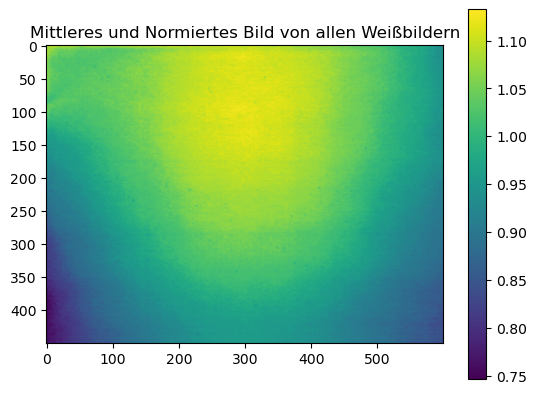

In [8]:
def read_white_image(img_num):
    white_img = cv2.imread("Kamera Messungen/testWeiss" + str(img_num) + ".png")
    white_img = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)
    return white_img[10:460, 0:600]

testImg = read_white_image(0)

white_images = np.array([
    read_white_image(0),
    read_white_image(1),
    read_white_image(2),
    read_white_image(3),
    read_white_image(4),
    read_white_image(5),
    read_white_image(6),
    read_white_image(7),
    read_white_image(8),
    read_white_image(9),
], dtype=np.float64)

summed_white_image = np.sum(white_images, axis=0)
mean_white_image = summed_white_image / size(white_images)

white_image = mean_white_image - mean_black_image
white_image = white_image / np.mean(white_image)

figure()
imshow(white_image)
colorbar()
title('Mittleres und Normiertes Bild von allen Weißbildern')
show()

def correct_image(img):
    img_shape = np.shape(img)
    cropped_white = white_image[0:img_shape[0], 0:img_shape[1]]
    corrected = (img - mean_black_image[0:img_shape[0], 0:img_shape[1]]) / cropped_white
    return corrected

# Dead/Stuck Pixels

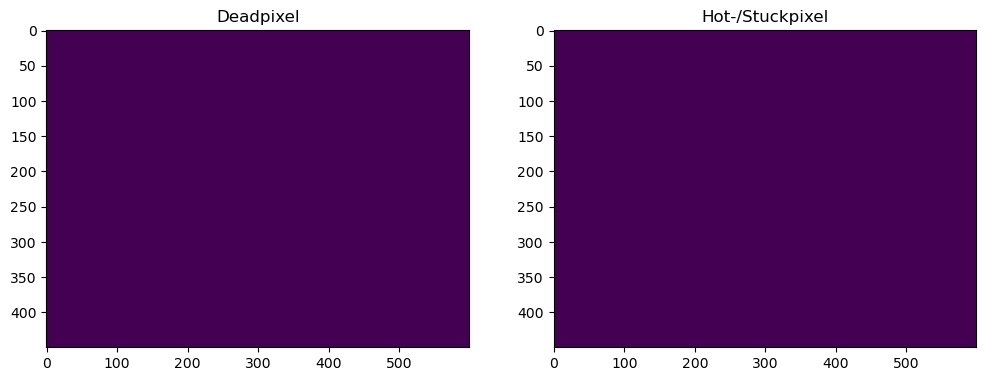

In [13]:
import copy

offset = 5 # Alle Dead Pixel mit Offset >= 5
# Je größer Offset wird, desto weniger Dead Pixel

weissbild_deadpix = copy.deepcopy(mean_white_image)

for i in range(len(weissbild_deadpix)):
    for j in range(len(weissbild_deadpix[i])):
            if (weissbild_deadpix[i][j] <= 255 - offset):
                weissbild_deadpix[i][j] = -1000

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_title("Deadpixel")
ax1.imshow(weissbild_deadpix)


# Findung von Hot-/Stuck Pixel im Dunkelbild:

offset = 5 # Alle Hot-/Stuck Pixel mit Offset >= 5
# Je größer Offset wird, desto weniger Hot-/Stuck Pixel

dunkelbild_pix = copy.deepcopy(mean_black_image)

for i in range(len(dunkelbild_pix)):
    for j in range(len(dunkelbild_pix[i])):
            if (dunkelbild_pix[i][j] >= offset):
                dunkelbild_pix[i][j] = 1000

ax2.set_title("Hot-/Stuckpixel")
ax2.imshow(dunkelbild_pix)

Es hat keine dead oder stuck pixels in unserem Bild.

# Bild Korrektur

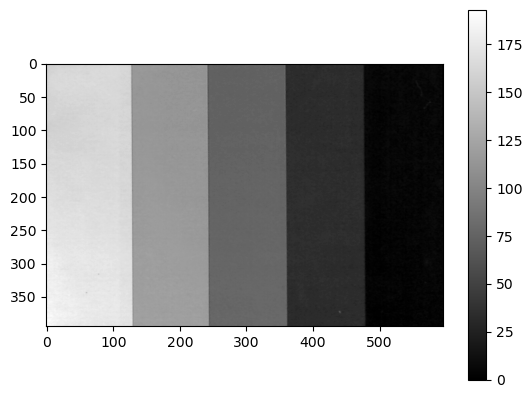

In [10]:
corrected = correct_image(grauwertkeil_unser)

figure()
imshow(corrected, cmap='gray')
colorbar()
show()

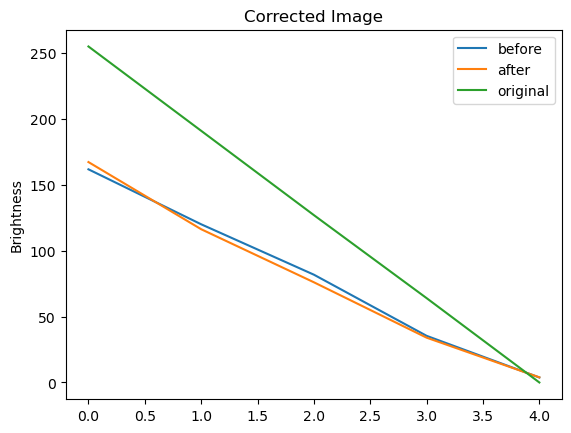

In [11]:
teil1 = corrected[:, 50:100]
teil2 = corrected[:, 150:200]
teil3 = corrected[:, 280:330]
teil4 = corrected[:, 400:450]
teil5 = corrected[:, 500:550]
teile_unser_bild = np.array([teil1, teil2, teil3, teil4, teil5])
teile_unser_bild_mean_corrected = np.array([np.mean(teil1), np.mean(teil2), np.mean(teil3), np.mean(teil4), np.mean(teil5)])
teile_unser_bild_std_corrected = np.array([np.std(teil1), np.std(teil2), np.std(teil3), np.std(teil4), np.std(teil5)])

figure()
x = range(0, 5)
title('Corrected Image')
ylabel('Brightness')

plot(x,teile_unser_bild_mean, label="before")
plot(x, teile_unser_bild_mean_corrected, label="after")
plot(x, teile_original_bild_mean, label="original")
legend()

# fill_between(x, teile_unser_bild_mean_corrected + teile_unser_bild_std_corrected, teile_unser_bild_mean_corrected - teile_unser_bild_std_corrected, alpha=0.3, color='red', linewidth=0)

show()